# Getting started with Captum Insights: a simple model on CIFAR10 dataset

Demonstrates how to use Captum Insights embedded in a notebook to debug a CIFAR model and test samples. This is a slight modification of the CIFAR_TorchVision_Interpret notebook.

More details about the model can be found here: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py
  
  **Note:** Before running this tutorial, please install the torchvision, and IPython packages.

In [1]:
import os

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

from captum.insights import AttributionVisualizer, Batch
from captum.insights.attr_vis.features import ImageFeature


Define functions for classification classes and pretrained model.

In [2]:
def get_classes():
    classes = [
        "Plane",
        "Car",
        "Bird",
        "Cat",
        "Deer",
        "Dog",
        "Frog",
        "Horse",
        "Ship",
        "Truck",
    ]
    return classes


def get_pretrained_model():
    class Net(nn.Module):
        def __init__(self):
            super(Net, self).__init__()
            self.conv1 = nn.Conv2d(3, 6, 5)
            self.pool1 = nn.MaxPool2d(2, 2)
            self.pool2 = nn.MaxPool2d(2, 2)
            self.conv2 = nn.Conv2d(6, 16, 5)
            self.fc1 = nn.Linear(16 * 5 * 5, 120)
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)
            self.relu1 = nn.ReLU()
            self.relu2 = nn.ReLU()
            self.relu3 = nn.ReLU()
            self.relu4 = nn.ReLU()

        def forward(self, x):
            x = self.pool1(self.relu1(self.conv1(x)))
            x = self.pool2(self.relu2(self.conv2(x)))
            x = x.view(-1, 16 * 5 * 5)
            x = self.relu3(self.fc1(x))
            x = self.relu4(self.fc2(x))
            x = self.fc3(x)
            return x

    net = Net()
    net.load_state_dict(torch.load("models/cifar_torchvision.pt"))
    return net


def baseline_func(input):
    return input * 0


def formatted_data_iter():
    dataset = torchvision.datasets.CIFAR10(
        root="data/test", train=False, download=True, transform=transforms.ToTensor()
    )
    dataloader = iter(
        torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=2)
    )
    while True:
        images, labels = next(dataloader)
        yield Batch(inputs=images, labels=labels)

Run the visualizer and render inside notebook for interactive debugging.

In [3]:
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
model = get_pretrained_model()
visualizer = AttributionVisualizer(
    models=[model],
    score_func=lambda o: torch.nn.functional.softmax(o, 1),
    classes=get_classes(),
    features=[
        ImageFeature(
            "Photo",
            baseline_transforms=[baseline_func],
            input_transforms=[normalize],
        )
    ],
    dataset=formatted_data_iter(),
)



In [4]:
visualizer.render()

CaptumInsights(insights_config={'classes': ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Sh…

Output()

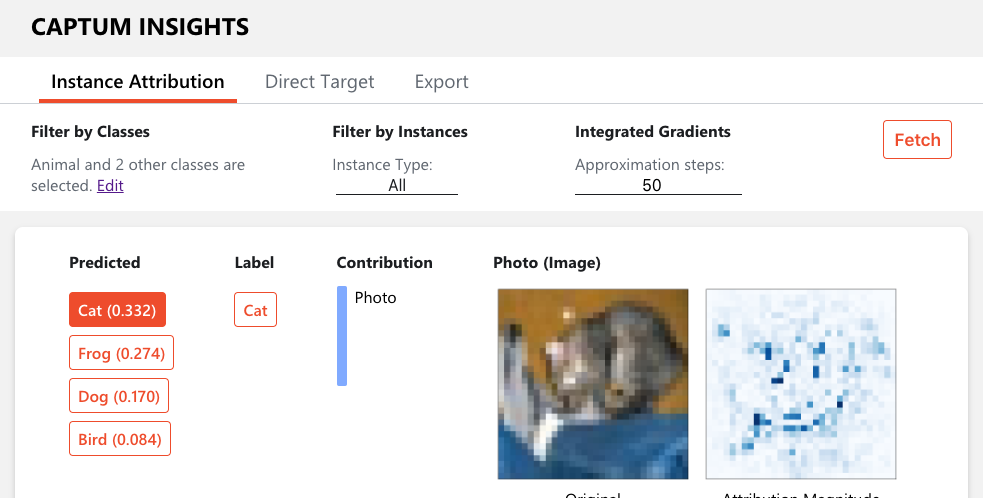

In [5]:
# show a screenshot if using notebook non-interactively
from IPython.display import Image
Image(filename='img/captum_insights.png')